In [18]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [44]:
train = pd.read_csv('../../Dataset/Knoctober/train/Train.csv',na_values=['None'])
camp = pd.read_csv('../../Dataset/Knoctober/train/Health_Camp_Detail.csv',na_values=['None'])
patient = pd.read_csv('../../Dataset/Knoctober/train/Patient_Profile.csv',na_values=['None'])
first = pd.read_csv('../../Dataset/Knoctober/train/First_Health_Camp_Attended.csv',na_values=['None'])
second = pd.read_csv('../../Dataset/Knoctober/train/Second_Health_Camp_Attended.csv',na_values=['None'])
third = pd.read_csv('../../Dataset/Knoctober/train/Third_Health_Camp_Attended.csv',na_values=['None'])
test = pd.read_csv('../../Dataset/Knoctober/test.csv',na_values=['None'])

In [45]:
train['source'] = 'train'
test['source'] = 'test'
data = pd.concat([train,test])
train.shape,test.shape,data.shape

((75278, 9), (35249, 9), (110527, 9))

In [46]:
data = data.merge(patient,on='Patient_ID').merge(camp,on='Health_Camp_ID').merge(pd.concat([first,second,third]),\
                                                                                how='left',on=['Patient_ID','Health_Camp_ID'])

In [47]:
data['Outcome'] = 0
data.loc[data['Number_of_stall_visited'] > 0,'Outcome'] = 1
data.loc[data['Health Score'].isnull() == False,'Outcome'] = 1
data.head()

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,source,Online_Follower,...,Category1,Category2,Category3,Donation,Health Score,Health_Score,Last_Stall_Visited_Number,Number_of_stall_visited,Unnamed: 4,Outcome
0,489652,6578,10-Sep-05,4,0,0,0,2,train,0,...,Third,G,2,NaN,NaN,NaN,1.0,2.0,NaN,1
1,507246,6578,18-Aug-05,45,5,0,0,7,train,0,...,Third,G,2,NaN,NaN,NaN,NaN,NaN,NaN,0
2,521364,6578,11-Oct-05,15,1,0,0,7,train,0,...,Third,G,2,NaN,NaN,NaN,NaN,NaN,NaN,0
3,523001,6578,02-Sep-05,0,0,0,0,0,train,0,...,Third,G,2,NaN,NaN,NaN,1.0,5.0,NaN,1
4,501457,6578,10-Aug-05,0,0,0,0,0,train,0,...,Third,G,2,NaN,NaN,NaN,NaN,NaN,NaN,0


In [48]:
data.drop(['Donation','Health Score','Health_Score','Last_Stall_Visited_Number','Number_of_stall_visited'],inplace='True',axis=1)

In [49]:
data.pop(data.columns[-2])
data.head()

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,source,Online_Follower,...,Age,First_Interaction,City_Type,Employer_Category,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3,Outcome
0,489652,6578,10-Sep-05,4,0,0,0,2,train,0,...,NaN,06-Dec-04,NaN,NaN,16-Aug-05,14-Oct-05,Third,G,2,1
1,507246,6578,18-Aug-05,45,5,0,0,7,train,0,...,40.0,08-Sep-04,C,Others,16-Aug-05,14-Oct-05,Third,G,2,0
2,521364,6578,11-Oct-05,15,1,0,0,7,train,0,...,40.0,04-Jul-03,I,Technology,16-Aug-05,14-Oct-05,Third,G,2,0
3,523001,6578,02-Sep-05,0,0,0,0,0,train,0,...,NaN,07-Apr-05,NaN,NaN,16-Aug-05,14-Oct-05,Third,G,2,1
4,501457,6578,10-Aug-05,0,0,0,0,0,train,0,...,NaN,28-Jan-03,B,NaN,16-Aug-05,14-Oct-05,Third,G,2,0


In [52]:
def get_mode(data,cname):
    return Counter(data[data[cname].isnull() == False][cname]).most_common(1)[0][0]

In [58]:
for col in data.columns:
    data[col] = data[col].fillna(get_mode(data,col))

In [61]:
if data.isnull().sum().sum() == 0:
    print 'NaNs Cleared'
else:
    'Warning'

NaNs Cleared


In [62]:
data.head()

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,source,Online_Follower,...,Age,First_Interaction,City_Type,Employer_Category,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3,Outcome
0,489652,6578,10-Sep-05,4,0,0,0,2,train,0,...,41.0,06-Dec-04,B,Technology,16-Aug-05,14-Oct-05,Third,G,2,1
1,507246,6578,18-Aug-05,45,5,0,0,7,train,0,...,40.0,08-Sep-04,C,Others,16-Aug-05,14-Oct-05,Third,G,2,0
2,521364,6578,11-Oct-05,15,1,0,0,7,train,0,...,40.0,04-Jul-03,I,Technology,16-Aug-05,14-Oct-05,Third,G,2,0
3,523001,6578,02-Sep-05,0,0,0,0,0,train,0,...,41.0,07-Apr-05,B,Technology,16-Aug-05,14-Oct-05,Third,G,2,1
4,501457,6578,10-Aug-05,0,0,0,0,0,train,0,...,41.0,28-Jan-03,B,Technology,16-Aug-05,14-Oct-05,Third,G,2,0


In [70]:
data['Days'] = pd.to_datetime(data['Registration_Date'])-pd.to_datetime(data['First_Interaction'])
data.head()

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,source,Online_Follower,...,First_Interaction,City_Type,Employer_Category,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3,Outcome,Days
0,489652,6578,10-Sep-05,4,0,0,0,2,train,0,...,06-Dec-04,B,Technology,16-Aug-05,14-Oct-05,Third,G,2,1,278 days
1,507246,6578,18-Aug-05,45,5,0,0,7,train,0,...,08-Sep-04,C,Others,16-Aug-05,14-Oct-05,Third,G,2,0,344 days
2,521364,6578,11-Oct-05,15,1,0,0,7,train,0,...,04-Jul-03,I,Technology,16-Aug-05,14-Oct-05,Third,G,2,0,830 days
3,523001,6578,02-Sep-05,0,0,0,0,0,train,0,...,07-Apr-05,B,Technology,16-Aug-05,14-Oct-05,Third,G,2,1,148 days
4,501457,6578,10-Aug-05,0,0,0,0,0,train,0,...,28-Jan-03,B,Technology,16-Aug-05,14-Oct-05,Third,G,2,0,925 days


In [72]:
data['Duration'] = pd.to_datetime(data['Camp_End_Date'])-pd.to_datetime(data['Camp_Start_Date'])
data.head()

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,source,Online_Follower,...,City_Type,Employer_Category,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3,Outcome,Days,Duration
0,489652,6578,10-Sep-05,4,0,0,0,2,train,0,...,B,Technology,16-Aug-05,14-Oct-05,Third,G,2,1,278 days,59 days
1,507246,6578,18-Aug-05,45,5,0,0,7,train,0,...,C,Others,16-Aug-05,14-Oct-05,Third,G,2,0,344 days,59 days
2,521364,6578,11-Oct-05,15,1,0,0,7,train,0,...,I,Technology,16-Aug-05,14-Oct-05,Third,G,2,0,830 days,59 days
3,523001,6578,02-Sep-05,0,0,0,0,0,train,0,...,B,Technology,16-Aug-05,14-Oct-05,Third,G,2,1,148 days,59 days
4,501457,6578,10-Aug-05,0,0,0,0,0,train,0,...,B,Technology,16-Aug-05,14-Oct-05,Third,G,2,0,925 days,59 days


In [75]:
data.drop(['Registration_Date','First_Interaction','Camp_Start_Date','Camp_End_Date'],axis=1,inplace=True)

In [81]:
data['Days'] = [int(str(i).split()[0]) for i in data['Days']]
data['Duration'] = [int(str(i).split()[0]) for i in data['Duration']]
data.head()

,Patient_ID,Health_Camp_ID,Var1,Var2,Var3,Var4,Var5,source,Online_Follower,LinkedIn_Shared,...,Education_Score,Age,City_Type,Employer_Category,Category1,Category2,Category3,Outcome,Days,Duration
0,489652,6578,4,0,0,0,2,train,0,0,...,82.0,41.0,B,Technology,Third,G,2,1,278,59
1,507246,6578,45,5,0,0,7,train,0,0,...,75.0,40.0,C,Others,Third,G,2,0,344,59
2,521364,6578,15,1,0,0,7,train,0,0,...,70.0,40.0,I,Technology,Third,G,2,0,830,59
3,523001,6578,0,0,0,0,0,train,0,0,...,82.0,41.0,B,Technology,Third,G,2,1,148,59
4,501457,6578,0,0,0,0,0,train,0,0,...,82.0,41.0,B,Technology,Third,G,2,0,925,59


In [89]:
for col in data.columns:
    if data[col].dtype == 'object' and col != 'source':
        data[col] = data[col].astype('category').cat.codes

In [91]:
data.head()

,Patient_ID,Health_Camp_ID,Var1,Var2,Var3,Var4,Var5,source,Online_Follower,LinkedIn_Shared,...,Education_Score,Age,City_Type,Employer_Category,Category1,Category2,Category3,Outcome,Days,Duration
0,489652,6578,4,0,0,0,2,train,0,0,...,82.0,41.0,1,11,2,6,2,1,278,59
1,507246,6578,45,5,0,0,7,train,0,0,...,75.0,40.0,2,7,2,6,2,0,344,59
2,521364,6578,15,1,0,0,7,train,0,0,...,70.0,40.0,8,11,2,6,2,0,830,59
3,523001,6578,0,0,0,0,0,train,0,0,...,82.0,41.0,1,11,2,6,2,1,148,59
4,501457,6578,0,0,0,0,0,train,0,0,...,82.0,41.0,1,11,2,6,2,0,925,59


In [92]:
data.drop(['Patient_ID'],axis=1,inplace=True)

In [93]:
data_train = data[data['source'] == 'train']
data_test = data[data['source'] == 'test']
print data_train.shape
print data_test.shape

(75278, 22)
(35249, 22)


In [95]:
y_train = data_train.pop('Outcome')
data_test.pop('Outcome')
print data_train.shape
print data_test.shape

(75278, 21)
(35249, 21)


In [109]:
data_train.pop('source')
y_train.head()

0    1
1    0
2    0
3    1
4    0
Name: Outcome, dtype: int64

In [113]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)

In [114]:
from sklearn.cross_validation import cross_val_score
score = cross_val_score(model,data_train,y_train,cv=5)

In [117]:
print 'CV Score: {}'.format(score.mean()*100)

CV Score: 80.1932356547


In [119]:
model.fit(data_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [122]:
feature_importance = pd.Series(model.feature_importances_,index=data_train.columns).sort_values(ascending=False)

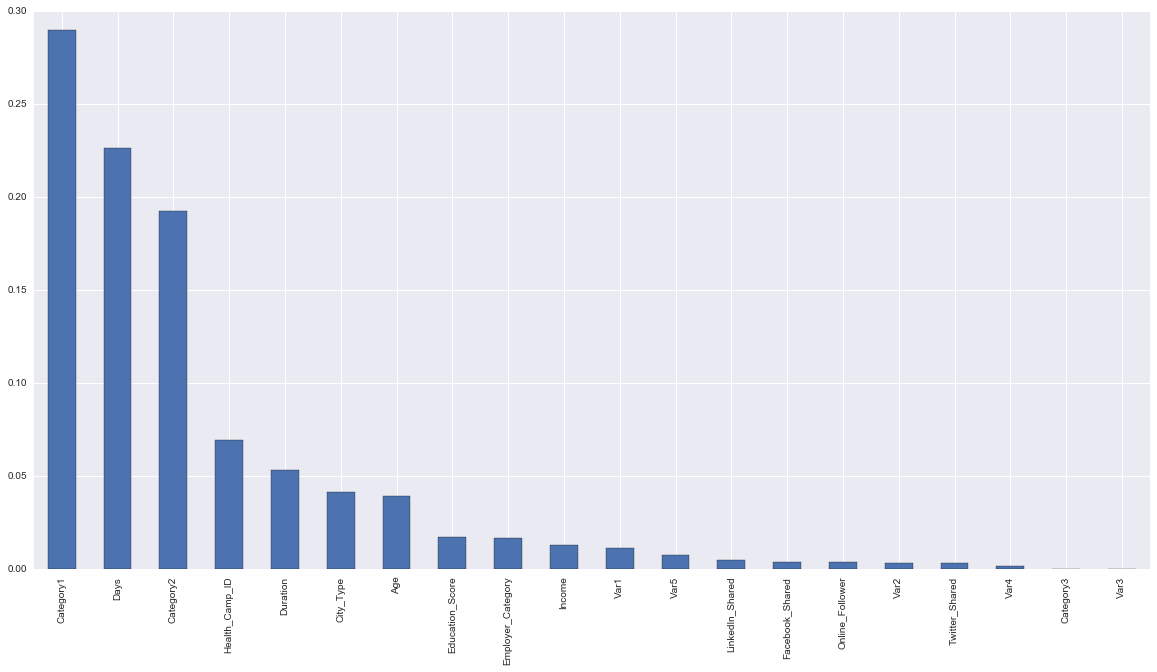

In [126]:
feature_importance.plot(kind='bar',figsize=(20,10))

In [133]:
model = RandomForestClassifier(n_estimators=100)
score = cross_val_score(model,data_train[feature_importance[feature_importance >= 0.03].index],y_train,cv=5)
print score.mean()*100

80.1440830788


In [134]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)

In [135]:
pca.fit(data_train)
T = pca.transform(data_train)
print T.shape

(75278, 2)


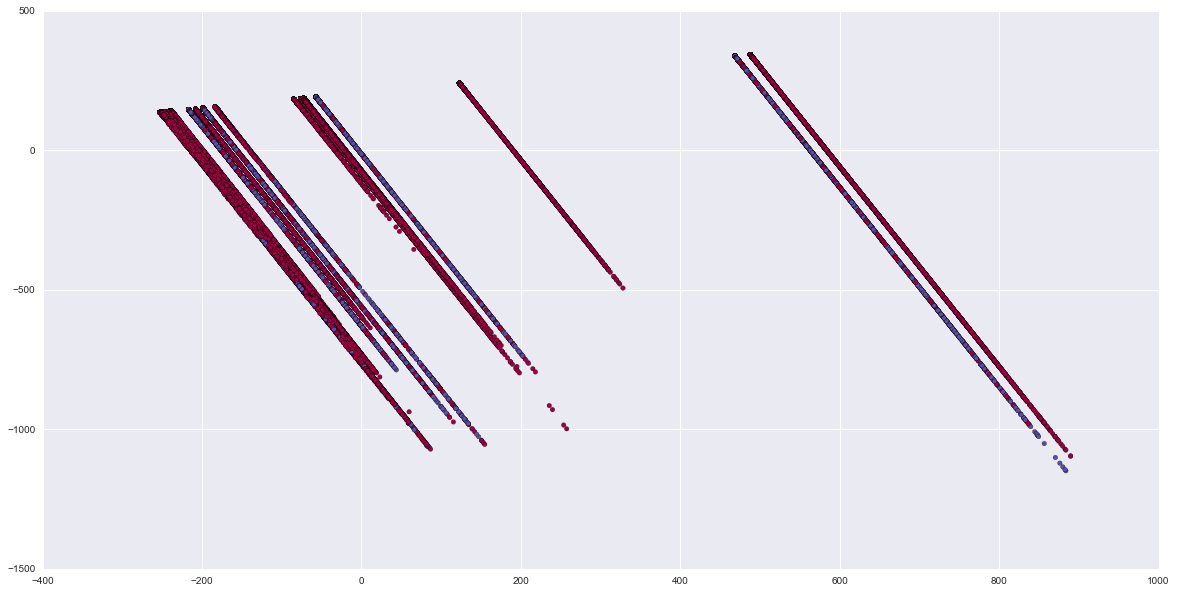

In [137]:
plt.figure(figsize=(20,10))
plt.scatter(T[:,0],T[:,1],c=y_train,cmap=plt.cm.Spectral)